# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

Year  Month                      Supplier ItemCode  \
0  2017      4               ROYAL WINE CORP   100200   
1  2017      4      SANTA MARGHERITA USA INC   100749   
2  2017      4            JIM BEAM BRANDS CO    10103   
3  2017      4  HEAVEN HILL DISTILLERIES INC    10120   
4  2017      4               ROYAL WINE CORP   101664   

                             Description ItemType  RetailSales  \
0                      GAMLA CAB - 750ML     WINE          0.0   
1   SANTA MARGHERITA P/GRIG ALTO - 375ML     WINE          0.0   
2  KNOB CREEK BOURBON 9YR - 100P - 375ML   LIQUOR          0.0   
3          J W DANT BOURBON 100P - 1.75L   LIQUOR          0.0   
4            RAMON CORDOVA RIOJA - 750ML     WINE          0.0   

   RetailTransfers  WarehouseSales  
0              1.0             0.0  
1              1.0             0.0  
2              8.0             0.0  
3              2.0             0.0  
4              4.0             0.0

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

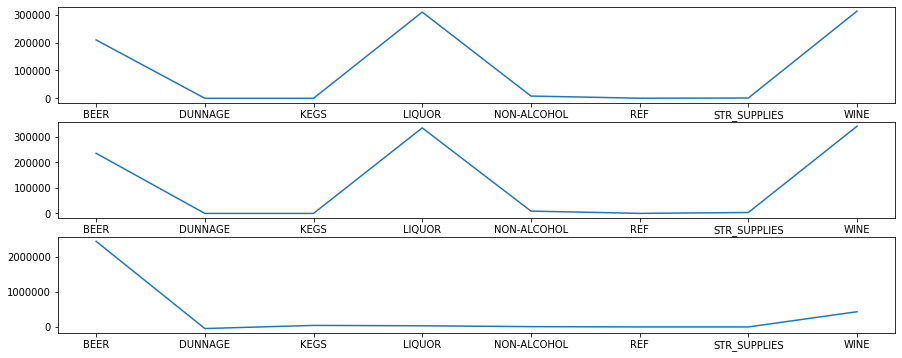

In [21]:
data.isnull().sum()
data=data.dropna()
data.isnull().sum()

#data.groupby('ItemType').agg(
#    RetailSalesSum = ('RetailSales',sum),
#    RetailTransfersSum = ('RetailTransfers',sum),
#    WareSalesSum = ('WarehouseSales',sum)
#)

sub1 = data.groupby('ItemType', as_index=False).agg({'RetailSales':'sum','RetailTransfers':'sum','WarehouseSales':'sum'})
sub1 = sub1.rename(columns={
    "RetailSales": "RetailSalesTotal", "RetailTransfers": "RetailTransfersTotal", "WarehouseSales": "WarehouseSalesTotal"
})
sub1

plt.figure(figsize=(15,6))
plt.subplot(3,1,1)
plt.plot(sub1.ItemType, sub1.RetailSalesTotal);
plt.subplot(3,1,2)
plt.plot(sub1.ItemType, sub1.RetailTransfersTotal);
plt.subplot(3,1,3)
plt.plot(sub1.ItemType, sub1.WarehouseSalesTotal);

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

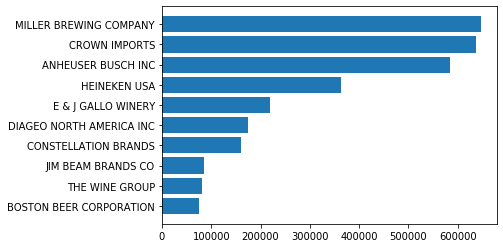

In [45]:
sub2 = data.groupby('Supplier',as_index=False)['RetailSales','RetailTransfers','WarehouseSales'].sum()
sub2['TotalSales']=sub2.sum(axis=1)
sub2 = sub2.sort_values(by='TotalSales', ascending=False).iloc[0:10]
sub2

plt.barh(sub2.Supplier,sub2.TotalSales,align='center');
plt.gca().invert_yaxis();

#Notas:
#ejemplo de como ordenar y seleccionar los últimos 15:
#df.groupby('start_station_name')['duration'].mean().sort_values().tail(15)

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

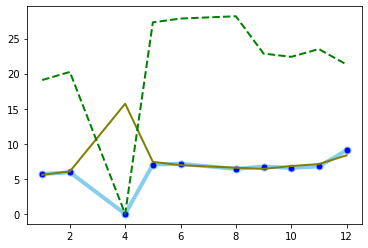

In [54]:
sub3 = data.groupby('Month', as_index=False).agg({'RetailSales':'mean','RetailTransfers':'mean','WarehouseSales':'mean'})
sub3

plt.plot(sub3.Month, sub3.RetailSales, marker='o', markerfacecolor='blue', markersize=7, color='skyblue', linewidth=4);
plt.plot(sub3.Month, sub3.RetailTransfers, marker='', color='olive', linewidth=2);
plt.plot(sub3.Month, sub3.WarehouseSales, marker='', color='g', linewidth=2, linestyle='dashed', label="toto");

## 4. Plot the same information as above but as a bar chart.

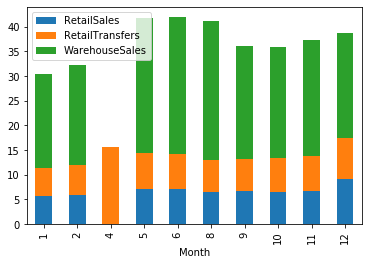

In [90]:
sub4 = data.groupby('Month', as_index=True).agg({'RetailSales':'mean','RetailTransfers':'mean','WarehouseSales':'mean'})

sub4.plot(kind='bar', stacked=True);

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

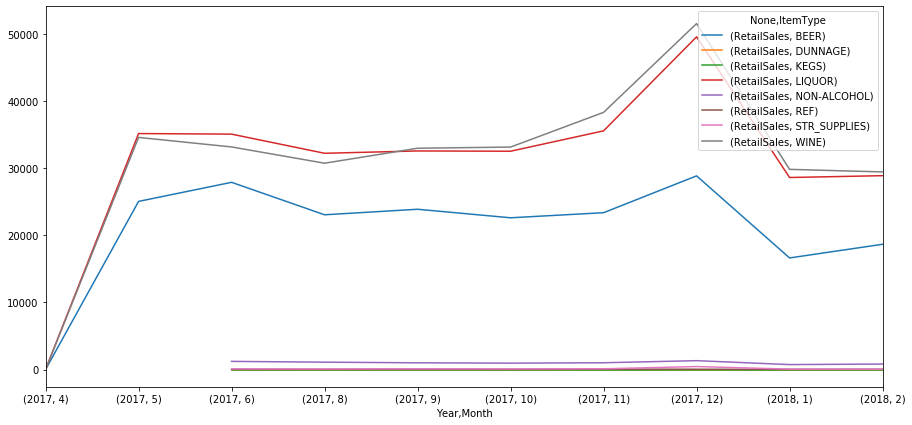

In [92]:
#sub5 = data.groupby(['Year','Month','ItemType'], as_index=True).agg({'RetailSales':'sum'})
#sub5

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
data.groupby(['Year','Month','ItemType']).agg({'RetailSales':'sum'}).unstack().plot(ax=ax);


## 6. Plot the same information as above but as a bar chart.

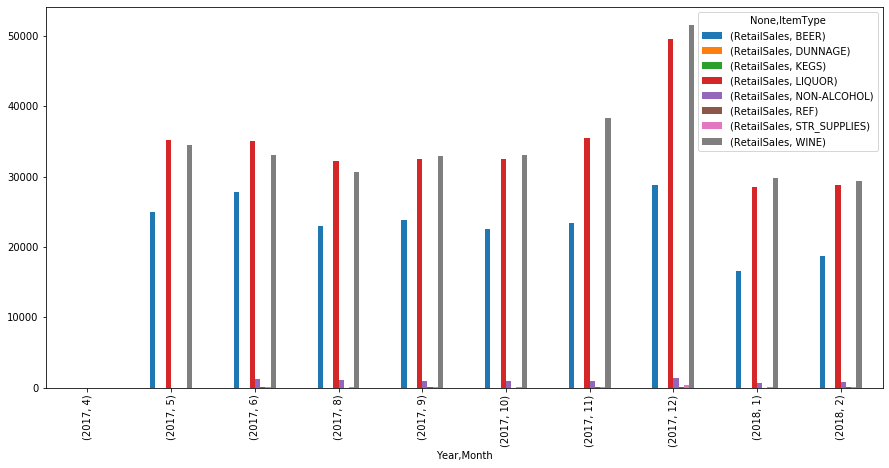

In [100]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Year','Month','ItemType']).agg({'RetailSales':'sum'}).unstack().plot(ax=ax,kind='bar');

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

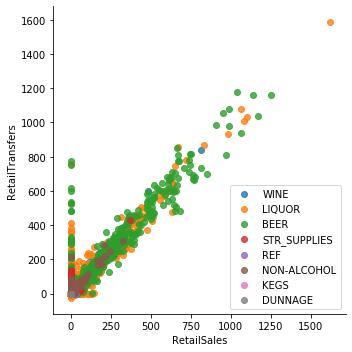

In [110]:
# library & dataset
import seaborn as sns
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="RetailSales", y="RetailTransfers", data=data, fit_reg=False, hue='ItemType', legend=False)
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

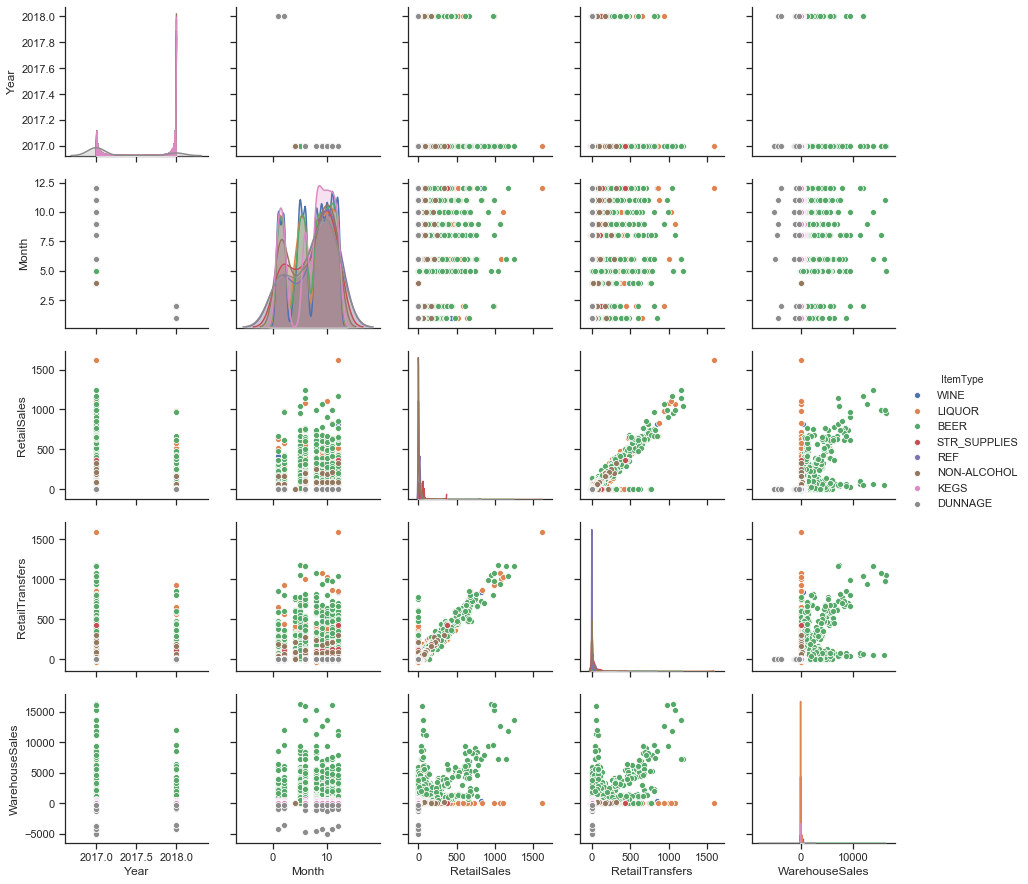

In [111]:
sns.set(style="ticks")

sns.pairplot(data,hue="ItemType")